In [24]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

S = 1000
mu = 4
sigma = 1
c = 10

def lotka_volterra(N, alpha):
    interaction_term = np.dot(alpha, N)  
    dNdt = N * (1 - N) - N * interaction_term
    return dNdt



def rk4_step(f, N, t, dt, h):
    k1 = f(N, h)
    k2 = f(N + 0.5 * dt * k1, h)
    k3 = f(N + 0.5 * dt * k2, h)
    k4 = f(N + dt * k3, h)
    return N + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)



def solve_lotka_volterra(alpha, N0, t_max, dt):
    t_values = np.arange(0, t_max, dt)
    N_values = np.zeros((len(t_values), len(N0)))
    N_values[0] = N0
    for i in range(1, len(t_values)):
        N_values[i] = rk4_step(lotka_volterra, N_values[i-1], t_values[i-1], dt, alpha)
    return t_values, N_values

def generate_random_undirected_graph():
    G = nx.erdos_renyi_graph(S, c/S)  
    return G

G = generate_random_undirected_graph()
adj_matrix = nx.to_numpy_array(G)
alpha = np.random.normal(mu/c , sigma/(np.sqrt(c)),size=(S,S))
interaction_matirx = adj_matrix * alpha
np.fill_diagonal(adj_matrix, 0)

N0 = np.random.uniform(0, 1, size=S)

t_max = 10000
dt = 0.1

t_values, N_values = solve_lotka_volterra(interaction_matirx, N0, t_max, dt)

# Plotting results
plt.figure(figsize=(10, 6))
for i in range(S):
    plt.plot(t_values, N_values[:, i])
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.title('General Lotka-Volterra')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

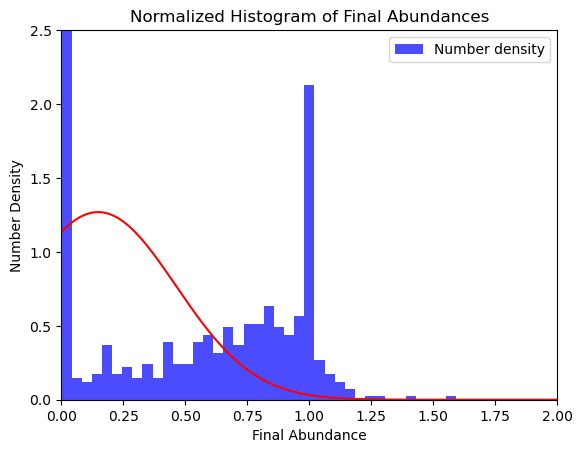

In [20]:
import numpy as np
from scipy.stats import norm
import scipy.optimize as opt


mean = 1 -(4*0.2130137731416583)
varience = (1**2)*0.09880843862243661
stabby = np.sqrt(varience)
x = np.linspace(0, 2, 1000)


final_abundances = N_values[-1] 
bin_edges = np.linspace(0, 2, 50)
hist, edges = np.histogram(final_abundances, bins=bin_edges) 
bin_width = edges[1] - edges[0]
number_density = hist / (len(final_abundances) * bin_width)
plt.bar(edges[:-1], number_density, width=bin_width, align='edge', alpha=0.7, color='blue', label='Number density')
plt.plot(x, norm.pdf(x, mean, stabby),color='r')
plt.ylim(0,2.5)
plt.xlim(0,2)
plt.xlabel("Final Abundance")
plt.ylabel("Number Density")
plt.title("Normalized Histogram of Final Abundances")
plt.legend()
plt.show()

## Supervison Notes


For standard Erdos-Renyi graphs parameterised by $G(S,P), P\in[0,1]$ and $S$ species (node) Number.
There are two interesting ideas. 
- if you take a large S limit for a fixed P the model should assume a similar model for the fully connected case, and so demonstable by the DMFT.
- if you take $P=\frac{C}{S}$ (nx.ER(S,C/S), this will differ from the model

ajust Scaling :
for sparce graph is makes more sence to scale acording to $\frac{\mu}{C}$ and $\frac{\sigma^2}{C}$

Interesting point with the Erdos Renyi around 1 -  as the model moves form low global connectivity to 1 large ecosytemn.

how does the PHI VS SIGMA plot change with system size?


## Analysis post dynamics graph structure:

- analysis PHI in chaotic phase
- can you quantifty how many species die and come back to life.
-  how does this quantiity change with mu or sigma


Possible quantiy: $N_i(t)<\epsilon$ and $N_i(t+\tau)>\epsilon$

is it possible to compute this with the DMFT, and in general what DMFT is there for chaotic phase.

explore consequences with a non zero lamdba 
what is the PHI - S for a sparse model
Sparce Model vs DMFT

In [71]:
DMFT_Dead = (1- 0.681056563702052)*S
print(DMFT_Dead)
Num_Dead = np.sum(N_values[-1] < 0.004)
print(Num_Dead)




318.943436297948
307
